# This notebook has the commands for creating a horizontal bar chart for substance use proportion data within communities

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_fluid_comm.csv')
#data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_fluid_comm.csv')
#data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_list_comm.csv')
#data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_list_comm.csv')

arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS2data_ARMS1pred.csv')
arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS1data_ARMS2pred.csv')
#arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS2data_ARMS1pred.csv')
#arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS1data_ARMS2pred.csv')

sui_df = pd.read_csv('./substance_use_rdata.csv', low_memory=False)

#data_arms1
arms1data_arms2comm

,subject_id,community
0,NDAR_INV003RTV85,2
1,NDAR_INV007W6H7B,2
2,NDAR_INV00BD7VDC,0
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,5
...,...,...
3141,NDAR_INVZY8L7CT1,4
3142,NDAR_INVZYC44GB8,0
3143,NDAR_INVZZ05KY5J,1
3144,NDAR_INVZZFG6J5U,4


In [20]:
sui_df.dtypes

Unnamed: 0                                   int64
IDS.CHR.GD.Site                             object
IDS.INT.GD.District                        float64
IDS.INT.GD.School                          float64
IDS.INT.GD.Family                            int64
IDS.INT.GD.Birth                            object
IDS.CHR.GD.Participant                      object
IDS.INT.GD.Participant                       int64
SSS.CHR.GD.ARMS_groups                      object
SSS.CHR.GD.Reproducible_matched_samples     object
SSS.INT.GD.ARMS_groups                       int64
SSS.CHR.GD.Time_point                       object
SSS.DBL.GD.Year                            float64
SSS.CHR.GD.Interview_date                   object
SSS.DTT.GD.Interview_date                   object
SSS.CHR.GD.Visit_type                       object
INC.LGC.GD.No_interview                       bool
SMP.INT.GD.Interview_age_in_months         float64
SMP.DBL.GD.Interview_age_in_years          float64
SMP.CHR.GD.Sibling_status      

In [21]:
sui_df['SSS.CHR.GD.Time_point'].value_counts()

SSS.CHR.GD.Time_point
baseline_year_1_arm_1       11868
6_month_follow_up_arm_1     11868
1_year_follow_up_y_arm_1    11868
18_month_follow_up_arm_1    11868
2_year_follow_up_y_arm_1    11868
30_month_follow_up_arm_1    11868
3_year_follow_up_y_arm_1    11868
42_month_follow_up_arm_1    11868
4_year_follow_up_y_arm_1    11868
Name: count, dtype: int64

In [22]:
#currently keeping all communities, regardless of size, because we are trying to evaluate across the arms with the overfit xgb model

#communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
#communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
#filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
#filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

filtered_data_arms1 = arms2data_arms1comm
filtered_data_arms2 = arms1data_arms2comm

In [23]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])

In [24]:
filtered_data_arms1

,subject_id,community
0,NDAR_INV00J52GPG,3
1,NDAR_INV00NPMHND,1
2,NDAR_INV01NAYMZH,3
3,NDAR_INV021403LF,7
4,NDAR_INV022ZVCT8,4
...,...,...
3171,NDAR_INVZZ3P1ZFJ,0
3172,NDAR_INVZZ6ZJ2KY,3
3173,NDAR_INVZZ81LEEV,0
3174,NDAR_INVZZZ2ALR6,1


In [25]:
sui_df = sui_df.rename(columns={
    'IDS.CHR.GD.Participant': 'subject_id',
    'SSS.CHR.GD.Time_point': 'eventname',
    'SBS.CHR.CS.ALC.Type_of_use': 'alcohol_use_type',
    'SBS.CHR.CS.NCT.Type_of_use': 'nicotine_use_type',
    'SBS.CHR.CS.CNN.Type_of_use': 'cannabis_use_type',
    'SBS.CHR.CS.OTH.Type_of_use': 'other_use_type',
    'SBS.CHR.CS.ANS.Type_of_use': 'any_use_type'})

sui_df

,Unnamed: 0,IDS.CHR.GD.Site,IDS.INT.GD.District,IDS.INT.GD.School,IDS.INT.GD.Family,IDS.INT.GD.Birth,subject_id,IDS.INT.GD.Participant,SSS.CHR.GD.ARMS_groups,SSS.CHR.GD.Reproducible_matched_samples,...,SSS.CHR.GD.Visit_type,INC.LGC.GD.No_interview,SMP.INT.GD.Interview_age_in_months,SMP.DBL.GD.Interview_age_in_years,SMP.CHR.GD.Sibling_status,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
0,1,site06,NaN,NaN,8781,87811,NDAR_INV003RTV85,1,ARMS-1,Discovery,...,On-site,False,131.0,10.916667,Single,No use,No use,No use,No use,No use
1,2,site06,NaN,NaN,8781,87811,NDAR_INV003RTV85,1,ARMS-1,Discovery,...,Remote,False,136.0,11.333333,Single,NaN,NaN,NaN,NaN,NaN
2,3,site06,NaN,NaN,8781,87811,NDAR_INV003RTV85,1,ARMS-1,Discovery,...,On-site,False,143.0,11.916667,Single,No use,No use,No use,No use,No use
3,4,site06,NaN,NaN,8781,87811,NDAR_INV003RTV85,1,ARMS-1,Discovery,...,Remote,False,148.0,12.333333,Single,NaN,NaN,NaN,NaN,NaN
4,5,site06,NaN,NaN,8781,87811,NDAR_INV003RTV85,1,ARMS-1,Discovery,...,Remote,False,157.0,13.083333,Single,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106807,106808,site19,NaN,NaN,7569,75691,NDAR_INVZZZP87KR,11868,ARMS-2,Replication,...,On-site,False,150.0,12.500000,Twin,No use,No use,No use,No use,No use
106808,106809,site19,NaN,NaN,7569,75691,NDAR_INVZZZP87KR,11868,ARMS-2,Replication,...,Remote,False,157.0,13.083333,Twin,NaN,NaN,NaN,NaN,NaN
106809,106810,site19,13715.0,NaN,7569,75691,NDAR_INVZZZP87KR,11868,ARMS-2,Replication,...,Remote,False,159.0,13.250000,Twin,No use,No use,No use,No use,No use
106810,106811,site19,NaN,NaN,7569,75691,NDAR_INVZZZP87KR,11868,ARMS-2,Replication,...,Remote,False,169.0,14.083333,Twin,NaN,NaN,NaN,NaN,NaN


In [26]:
final_df_columns = ['subject_id','eventname','alcohol_use_type','nicotine_use_type','cannabis_use_type','other_use_type','any_use_type']
sui_df = sui_df[sui_df.columns.intersection(final_df_columns)]
sui_df

,subject_id,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
0,NDAR_INV003RTV85,baseline_year_1_arm_1,No use,No use,No use,No use,No use
1,NDAR_INV003RTV85,6_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
3,NDAR_INV003RTV85,18_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...
106807,NDAR_INVZZZP87KR,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106808,NDAR_INVZZZP87KR,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
106809,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106810,NDAR_INVZZZP87KR,42_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN


# merge sui with filtered frf (or xgb) communities

In [27]:
merged_use_df = filtered_data_arms1.merge(sui_df, on='subject_id', how='outer')
merged_use_df

,subject_id,community,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
0,NDAR_INV003RTV85,NaN,baseline_year_1_arm_1,No use,No use,No use,No use,No use
1,NDAR_INV003RTV85,NaN,6_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,NaN,1_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
3,NDAR_INV003RTV85,NaN,18_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV003RTV85,NaN,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...,...
106814,NDAR_INVZZZP87KR,NaN,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106815,NDAR_INVZZZP87KR,NaN,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
106816,NDAR_INVZZZP87KR,NaN,3_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106817,NDAR_INVZZZP87KR,NaN,42_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN


In [28]:
merged_use_df['community'].isna().sum()

78291

In [29]:
merged_use_no_nan = merged_use_df.dropna(subset=['community'])
merged_use_no_nan

,subject_id,community,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
54,NDAR_INV00J52GPG,3.0,baseline_year_1_arm_1,Experimentation,No use,No use,No use,Experimentation
55,NDAR_INV00J52GPG,3.0,6_month_follow_up_arm_1,Experimentation,NaN,NaN,NaN,Experimentation
56,NDAR_INV00J52GPG,3.0,1_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
57,NDAR_INV00J52GPG,3.0,18_month_follow_up_arm_1,Experimentation,NaN,NaN,NaN,Experimentation
58,NDAR_INV00J52GPG,3.0,2_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
...,...,...,...,...,...,...,...,...
106805,NDAR_INVZZZNB0XC,1.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN
106806,NDAR_INVZZZNB0XC,1.0,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN
106807,NDAR_INVZZZNB0XC,1.0,3_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106808,NDAR_INVZZZNB0XC,1.0,42_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN


In [30]:
desired_sessions = ['4_year_follow_up_y_arm_1',
                    '3_year_follow_up_y_arm_1',
                    '2_year_follow_up_y_arm_1',
                    '1_year_follow_up_y_arm_1']
filtered_use_df = merged_use_no_nan[merged_use_no_nan['eventname'].isin(desired_sessions)]
filtered_use_df

,subject_id,community,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
56,NDAR_INV00J52GPG,3.0,1_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
58,NDAR_INV00J52GPG,3.0,2_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
60,NDAR_INV00J52GPG,3.0,3_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
62,NDAR_INV00J52GPG,3.0,4_year_follow_up_y_arm_1,Experimentation,NaN,NaN,NaN,Experimentation
83,NDAR_INV00NPMHND,1.0,1_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...,...
106800,NDAR_INVZZZ2ALR6,1.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
106803,NDAR_INVZZZNB0XC,1.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN
106805,NDAR_INVZZZNB0XC,1.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN
106807,NDAR_INVZZZNB0XC,1.0,3_year_follow_up_y_arm_1,No use,No use,No use,No use,No use


In [31]:
info_columns = ['alcohol_use_type','nicotine_use_type','cannabis_use_type','other_use_type','any_use_type']

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
curated_sui_df = keep_all_with_info(filtered_use_df, 'subject_id', info_columns)
curated_sui_df

,subject_id,community,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
56,NDAR_INV00J52GPG,3.0,1_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
58,NDAR_INV00J52GPG,3.0,2_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
60,NDAR_INV00J52GPG,3.0,3_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
62,NDAR_INV00J52GPG,3.0,4_year_follow_up_y_arm_1,Experimentation,NaN,NaN,NaN,Experimentation
83,NDAR_INV00NPMHND,1.0,1_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...,...
106796,NDAR_INVZZZ2ALR6,1.0,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
106798,NDAR_INVZZZ2ALR6,1.0,3_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
106800,NDAR_INVZZZ2ALR6,1.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
106807,NDAR_INVZZZNB0XC,1.0,3_year_follow_up_y_arm_1,No use,No use,No use,No use,No use


In [32]:
four_year_info = curated_sui_df[curated_sui_df['eventname'].str.contains('4_year_follow_up_y_arm_1')]
four_year_info['alcohol_use_type'].value_counts()

alcohol_use_type
Experimentation    1000
No use              831
Initiation           31
Name: count, dtype: int64

In [97]:
def keep_latest_with_info(df, id_column, event_column, info_columns):
    # Sort the dataframe by id and event (assuming later events are more recent)
    df = df.sort_values([id_column, event_column], ascending=[True, False])
    # Function to check if a row has any non-NaN values in info columns
    def has_info(group):
        return group[info_columns].notna().any(axis=1)
    # Apply the has_info function to each group
    mask = df.groupby(id_column).apply(has_info).reset_index(level=0, drop=True)
    # Return the filtered dataframe
    return df[mask].groupby(id_column).first().reset_index()
# Usage
only_latest_sui_df = keep_latest_with_info(curated_sui_df, 'subject_id', 'eventname', info_columns)
only_latest_sui_df

/tmp/ipykernel_4063363/1002520456.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mask = df.groupby(id_column).apply(has_info).reset_index(level=0, drop=True)


,subject_id,community,eventname,alcohol_use_type,nicotine_use_type,cannabis_use_type,other_use_type,any_use_type
0,NDAR_INV00J52GPG,3.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
1,NDAR_INV00NPMHND,1.0,1_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
2,NDAR_INV01NAYMZH,3.0,4_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
3,NDAR_INV021403LF,7.0,4_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
4,NDAR_INV022ZVCT8,4.0,2_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
...,...,...,...,...,...,...,...,...
3088,NDAR_INVZZ3P1ZFJ,0.0,4_year_follow_up_y_arm_1,No use,No use,No use,No use,No use
3089,NDAR_INVZZ6ZJ2KY,3.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
3090,NDAR_INVZZ81LEEV,0.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation
3091,NDAR_INVZZZ2ALR6,1.0,4_year_follow_up_y_arm_1,Experimentation,No use,No use,No use,Experimentation


In [98]:
only_latest_sui_df['any_use_type'].value_counts(dropna=False)

any_use_type
No use             2016
Experimentation     913
Initiation          164
Name: count, dtype: int64

## define usage type

In [107]:
usage_type = 'any_use_type'
#usage_type = 'alcohol_use_type'
#usage_type = 'nicotine_use_type'
#usage_type = 'cannabis_use_type'
#usage_type = 'other_use_type'

In [108]:
def summarize_by_usage_class(df):
    summary = df.groupby(['community', usage_type], observed=False).size().reset_index(name='count')
    return summary

In [109]:
use_df_counts = summarize_by_usage_class(only_latest_sui_df)
use_df_counts

,community,any_use_type,count
0,0.0,Experimentation,257
1,0.0,Initiation,41
2,0.0,No use,451
3,1.0,Experimentation,178
4,1.0,Initiation,18
5,1.0,No use,478
6,2.0,Experimentation,92
7,2.0,Initiation,14
8,2.0,No use,252
9,3.0,Experimentation,116


In [110]:
#function to aggregate the new summary data
#def aggregate_summary_data(summary_data):
#    return summary_data.groupby(['community', usage_type],observed=False).agg(count=('count', 'sum')).reset_index()

In [111]:
#use_df_agg_counts = aggregate_summary_data(use_df_counts)
#use_df_agg_counts

In [112]:
#calculate the relevant proportions and add it as a new column
use_df_counts['proportion'] = use_df_counts.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
use_df_counts

,community,any_use_type,count,proportion
0,0.0,Experimentation,257,0.343124
1,0.0,Initiation,41,0.054740
2,0.0,No use,451,0.602136
3,1.0,Experimentation,178,0.264095
4,1.0,Initiation,18,0.026706
5,1.0,No use,478,0.709199
6,2.0,Experimentation,92,0.256983
7,2.0,Initiation,14,0.039106
8,2.0,No use,252,0.703911
9,3.0,Experimentation,116,0.266667


In [113]:
#pivot the data to prepare it for visualization
df_pivot = use_df_counts.pivot(index='community', columns=usage_type, values='proportion')
df_pivot = df_pivot.sort_index()
#cols = df_pivot.columns.tolist()
cols = ["Initiation", "Experimentation", "No use"]
df_pivot = df_pivot[cols]
df_pivot

any_use_type,Initiation,Experimentation,No use
community,,,
0.0,0.054740,0.343124,0.602136
1.0,0.026706,0.264095,0.709199
2.0,0.039106,0.256983,0.703911
3.0,0.075862,0.266667,0.657471
4.0,0.053254,0.366864,0.579882
5.0,0.060185,0.268519,0.671296
6.0,0.066667,0.288889,0.644444
7.0,0.086207,0.258621,0.655172
8.0,0.100000,0.261538,0.638462


# python eda. if not using R dataframe

In [45]:
substance_use_df = pd.read_csv('./all_sui_l_metrics.csv')
substance_use_df = substance_use_df.rename(columns={'src_subject_id': 'subject_id'})
substance_use_df

,subject_id,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV005V6D2C,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49146,NDAR_INVZZZP87KR,1_year_follow_up_y_arm_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49147,NDAR_INVZZZP87KR,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49148,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49149,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
merged_use_df = filtered_data_arms1.merge(substance_use_df, on='subject_id', how='outer')
merged_use_df

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV005V6D2C,NaN,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49146,NDAR_INVZZZP87KR,NaN,1_year_follow_up_y_arm_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49147,NDAR_INVZZZP87KR,NaN,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49148,NDAR_INVZZZP87KR,NaN,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49149,NDAR_INVZZZP87KR,NaN,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merged_use_df['community'].isna().sum()

35917

In [48]:
merged_use_no_nan = merged_use_df.dropna(subset=['community'])
merged_use_no_nan

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NDAR_INV007W6H7B,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49113,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49119,NDAR_INVZZL0VA2F,1.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
49120,NDAR_INVZZL0VA2F,1.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49121,NDAR_INVZZL0VA2F,1.0,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_use_no_nan['tlfb_alc_l'].value_counts(dropna=False)

tlfb_alc_l
NaN    13134
1.0       69
0.0       31
Name: count, dtype: int64

In [61]:
heard_of_l_columns = ['tlfb_alc_l',
                      'tlfb_tob_l',
                      'tlfb_mj_l',
                      'tlfb_mj_synth_l', #synthetic mj
                      'tlfb_bitta_l', #bittamugen or byphoditin
                      'tlfb_inhalant_l', #sniffing prodects to get high
                      'tlfb_rx_misuse_l', #prescription med abuse
                      'tlfb_list_yes_no_l'] #Have you heard of people using anything else to make them feel high, dizzy or different?


#def keep_latest_with_info(df, id_column, event_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
#    def has_info(group):
#        return group[info_columns].notna().any(axis=1)
    # Group by id, apply the has_info function, and keep the first True result
#    mask = df.groupby(id_column).apply(has_info).reset_index(level=0, drop=True)
    # Return the filtered dataframe
#    return df[mask].groupby(id_column).first().reset_index()
# Usage
#merged_use_df = keep_latest_with_info(merged_use_no_nan, 'subject_id', 'eventname', heard_of_l_columns)

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
merged_use_df = keep_all_with_info(merged_use_no_nan, 'src_subject_id', heard_of_l_columns)

In [62]:
merged_use_df

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NDAR_INV00BD7VDC,5.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,NaN,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
12,NDAR_INV00BD7VDC,5.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NDAR_INV00HEV6HB,1.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,1.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49079,NDAR_INVZZ05KY5J,1.0,1_year_follow_up_y_arm_1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49080,NDAR_INVZZ05KY5J,1.0,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49110,NDAR_INVZZFG6J5U,4.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
49111,NDAR_INVZZFG6J5U,4.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
merged_use_df['tlfb_alc_l'].value_counts(dropna=False)

tlfb_alc_l
NaN    5798
1.0      69
0.0      31
Name: count, dtype: int64

In [ ]:
experimentation_columns = ['tlfb_alc_sip_l',
                           'tlfb_tob_puff_l',
                           'tlfb_mj_puff_l',
                           'tlfb_mj_synth_use_l', #synthetic mj
                           'tlfb_bitta_use_l', #bittamugen or byphoditin
                           'tlfb_inhalant_use_l', #sniffing prodects to get high
                           #'tlfb_sniff_use_l',
                           'tlfb_cough_use_l', #prescription med abuse
                           'tlfb_tranq_use_l',
                           'tlfb_vicodin_use_l',
                           'tlfb_opi_use_l',
                           'tlfb_coc_use_l', #cocaine
                           'tlfb_bsalts_use_l', #bath salts
                           'tlfb_meth_use_l', #methamphetamine
                           'tlfb_amp_use_l', #amphetamine
                           'tlfb_mdma_use_l',
                           'tlfb_ket_use_l', #ketamine
                           'tlfb_ghb_use_l', #gbh
                           'tlfb_shrooms_use_l', #mushrooms
                           'tlfb_salvia_use_l', #salvia
                           'tlfb_steroids_use_l'] #steroids

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
merged_use_df = keep_all_with_info(merged_use_no_nan, 'src_subject_id', experimentation_columns)

In [28]:
#conditions = [
#    merged_use_nonan_df['tlfb_cal_scr_num_events'] == 0.0,
#    merged_use_nonan_df['tlfb_cal_scr_num_events'].isin([1.0, 2.0]),
#    (merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 3.0) & (merged_use_nonan_df['tlfb_cal_scr_num_events'] <= 9.0),
#    merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 10.0
#]

#values = [1,2,3,4]

#merged_use_nonan_df_new = pd.DataFrame({'subject_id': merged_use_nonan_df['subject_id'], 'community': merged_use_nonan_df['community'], 'tlfb_cal_scr_num_events': merged_use_nonan_df['tlfb_cal_scr_num_events']})


#merged_use_nonan_df_new['usage_class'] = np.select(conditions, values, default=np.nan).astype(int)
#merged_use_nonan_df_new

In [29]:
merged_use_df

,subject_id,community,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l
0,NDAR_INV003RTV85,7.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0
1,NDAR_INV00BD7VDC,5.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0
2,NDAR_INV00HEV6HB,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0
3,NDAR_INV00LH735Y,8.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,NDAR_INV00R4TXET,2.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3040,NDAR_INVZY8L7CT1,4.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0
3041,NDAR_INVZYC44GB8,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
3042,NDAR_INVZZ05KY5J,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3043,NDAR_INVZZFG6J5U,4.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0


In [30]:
merged_use_df['community'].unique()

array([7., 5., 1., 8., 2., 4., 3., 9., 6.])

In [31]:
def summarize_by_usage_class(df):
    summary = df.groupby(['community', 'usage_class'], observed=False).size().reset_index(name='count')
    #for comm in summary['community'].unique():
    #    for usage_class in summary['usage_class'].unique():
    #        if comm not in summary['community']:
    #            summary['count'] = 0
    
    #summary = summary.sort_index(axis=1).reset_index()
    
    #summary = summary.melt(id_vars=['community'], var_name='usage_class', value_name='count')
    
    #summary = summary.sort_values(['community', 'usage_class']).reset_index(drop=True)
    return summary

In [32]:
#merged_use_df_counts = summarize_by_usage_class(merged_use_nonan_df_new)
#merged_use_df_counts

In [33]:
#function to aggregate the new summary data

def aggregate_summary_data(summary_data):
    return summary_data.groupby(['community', 'usage_class'],observed=False).agg(count=('count', 'sum')).reset_index()

In [34]:
#merged_use_df_counts_test = aggregate_summary_data(merged_use_df_counts)
#merged_use_df_counts_test

In [35]:
#calculate the relevant proportions and add it as a new column
#merged_use_df_counts_test['proportion'] = merged_use_df_counts_test.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
#merged_use_df_counts_test

In [36]:
#pivot the data to prepare it for visualization

#df_pivot = merged_use_df_counts_test.pivot(index='community', columns='usage_class', values='proportion')
#df_pivot = df_pivot.sort_index()
#df_pivot

# Create Plot. Make sure figure is named properly

<Figure size 2500x1000 with 0 Axes>

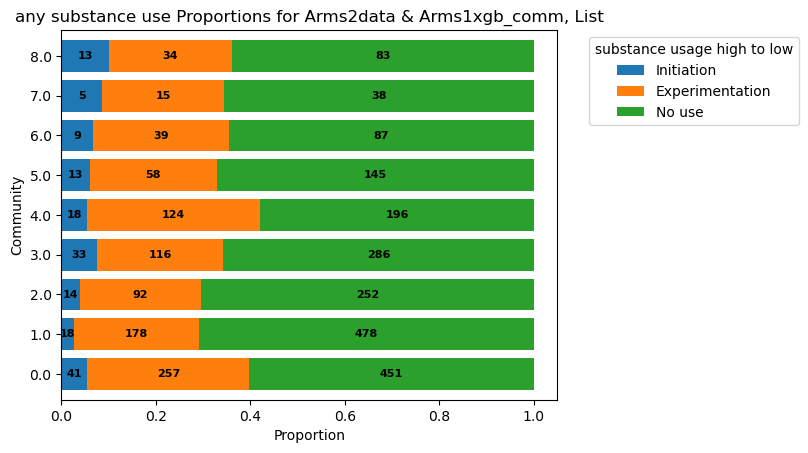

In [114]:
#plot the horizontal bar chart of the adhd label proportion data

#create the horizontal stacked bar chart
plt.figure(figsize=(25, 10))
ax = df_pivot.plot(kind='barh', stacked=True, width=0.8)

#customize the plot
plt.title('any substance use Proportions for Arms2data & Arms1xgb_comm, List')
plt.xlabel('Proportion')
plt.ylabel('Community')

#remove the legend from its current position
plt.legend().remove()

#add a legend to the right of the plot
plt.legend(title='substance usage high to low', bbox_to_anchor=(1.05, 1), loc='upper left')

#adding in counts info
count_data = use_df_counts.pivot(index='community', columns='any_use_type', values='count').fillna(0)

# Add count annotations on top of each segment in the bar
for i, community in enumerate(df_pivot.index):
    cumulative = 0
    for j, col in enumerate(df_pivot.columns):
        value = df_pivot.iloc[i, j]
        count = count_data.loc[community, col] if community in count_data.index and col in count_data.columns else 0
        middle = cumulative + value / 2
        ax.text(middle, i, f'{int(count)}', va='center', ha='center', fontweight='bold', fontsize=8)
        cumulative += value

#add percentage labels on the bars
#for c in ax.containers:
#    ax.bar_label(c, fmt='%.2f%%', label_type='center')

#adjust layout and display the plot
#plt.tight_layout()
plt.savefig('/home/faird/lundq163/projects/FRF_results_viz/substance_use_work/list_sub_use_proportions_arms2data_arms1xgbcomm_horzbar.png', dpi=300, bbox_inches='tight')
plt.show()

# trying something else

In [37]:
merged_use_df.head(5)

,subject_id,community,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l
0,NDAR_INV003RTV85,7.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0
1,NDAR_INV00BD7VDC,5.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0
2,NDAR_INV00HEV6HB,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0
3,NDAR_INV00LH735Y,8.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,NDAR_INV00R4TXET,2.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0


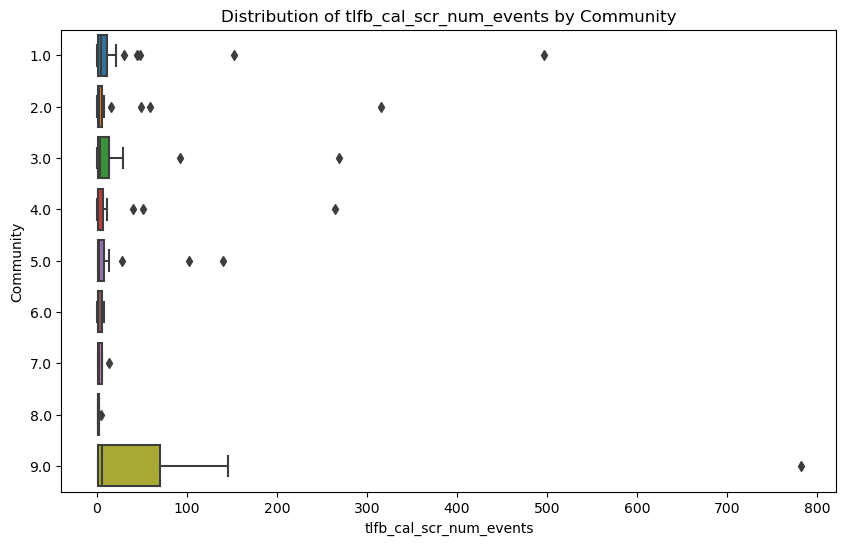

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

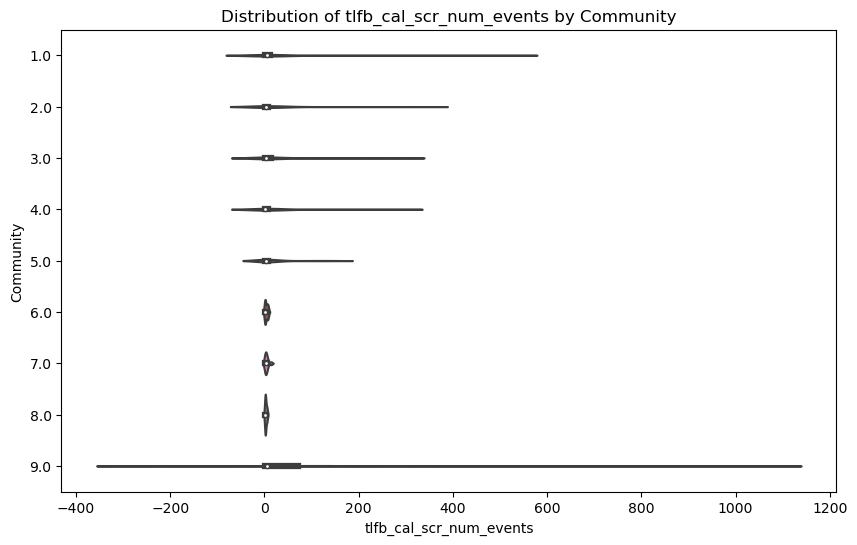

In [128]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

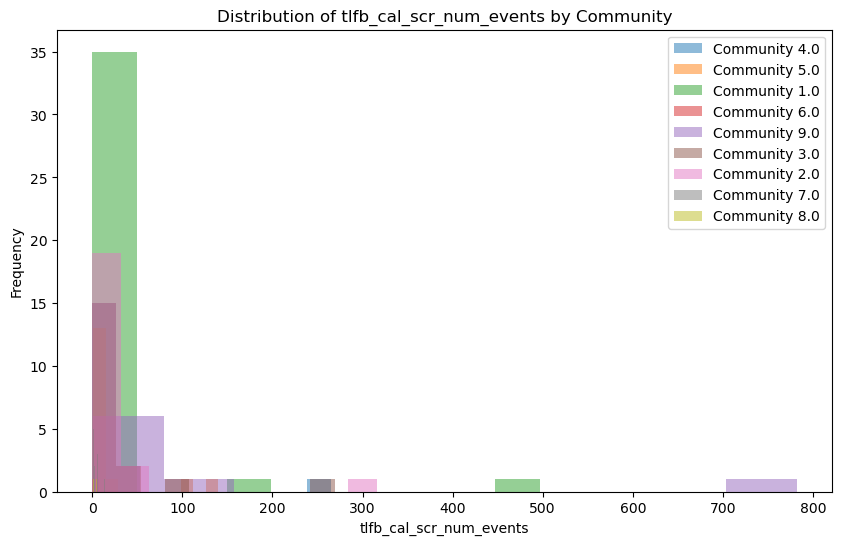

In [133]:
plt.figure(figsize=(10, 6))

for community in merged_use_nonan_df['community'].unique():
    community_data = merged_use_nonan_df[merged_use_nonan_df['community'] == community]['tlfb_cal_scr_num_events']
    plt.hist(community_data, bins=10, alpha=0.5, label=f'Community {community}')

plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Frequency')
plt.legend()
plt.show()

ValueError: autodetected range of [nan, nan] is not finite

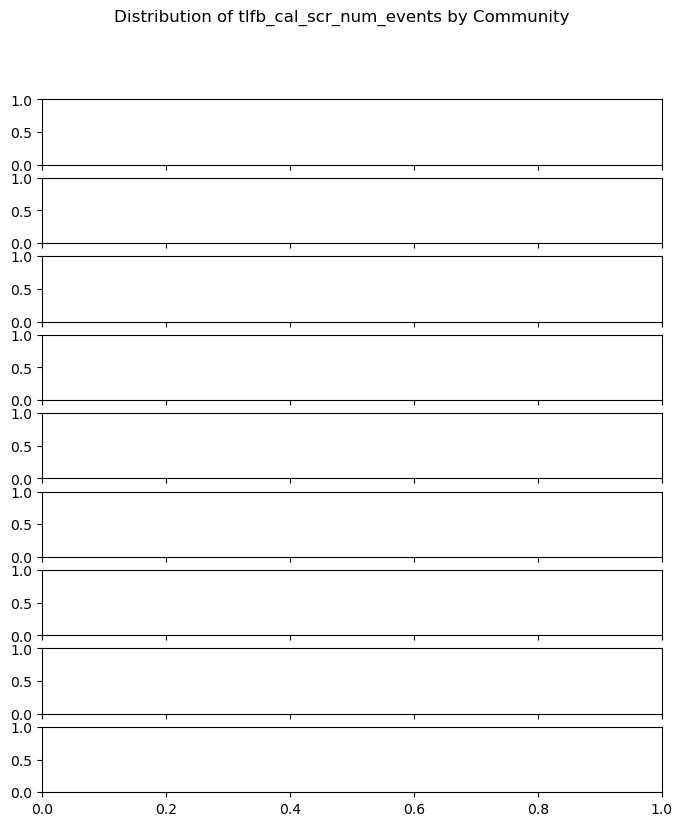

In [39]:
sorted_communities = sorted(merged_use_df['community'].unique(), reverse=True)
height_per_subplot = 1

# Create subplots
fig, axs = plt.subplots(len(sorted_communities), 1, figsize=(8, height_per_subplot*len(sorted_communities)), sharex=True, sharey=True)
fig.suptitle('Distribution of tlfb_cal_scr_num_events by Community')

# Find the overall max frequency for y-axis limit
max_freq = 0

# First pass to calculate histogram data and find max frequency
hist_data = []
for community in sorted_communities:
    community_data = merged_use_df[merged_use_df['community'] == community][heard_of_l_columns]
    counts, _ = np.histogram(community_data, bins=10)
    max_freq = max(max_freq, counts.max())
    hist_data.append((community_data, counts))

# Plot histogram for each community
for i, (community, (community_data, counts)) in enumerate(zip(sorted_communities, hist_data)):
    axs[i].hist(community_data, bins=10, edgecolor='black')
    axs[i].set_ylabel(f'{community}')
    axs[i].set_ylim(0, max_freq * 1.1)  # Set y-axis limit with 10% padding

# Remove x-labels and tick labels for all but the bottom subplot
for ax in axs[:-1]:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-label for the bottom subplot
axs[-1].set_xlabel('tlfb_cal_scr_num_events')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [123]:
merged_use_nonan_df.groupby(['community', 'tlfb_cal_scr_num_events'],observed=False).agg(count=('subject_id', 'sum')).reset_index()
merged_use_nonan_df


,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0
...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0
3563,NDAR_INVZD57Y0V7,3.0,12.0
3565,NDAR_INVZDYWHP34,5.0,1.0
3578,NDAR_INVZK8052MG,1.0,7.0


In [124]:
df_pivot = merged_use_nonan_df.pivot(index='community', columns='tlfb_cal_scr_num_events', values='subject_id')
df_pivot

ValueError: Index contains duplicate entries, cannot reshape